# 1. <a id='toc1_'></a>[5° HackDays Comunidade DS](#toc0_)

---

**Table of contents**<a id='toc0_'></a>    
- 1. [5° HackDays Comunidade DS](#toc1_)    
- 2. [Imports](#toc2_)    
  - 2.1. [Libraries](#toc2_1_)    
  - 2.2. [Data](#toc2_2_)    
- 3. [Helper Functions](#toc3_)    
- 4. [Data Exploration and problem comprehension](#toc4_)    
  - 4.1. [First data manipulations](#toc4_1_)    
    - 4.1.1. [Formatting data columns](#toc4_1_1_)    
    - 4.1.2. [Data description](#toc4_1_2_)    
      - 4.1.2.1. [Evaluations made by children](#toc4_1_2_1_)    
      - 4.1.2.2. [Checking the scoring for each evaluation criteria for all the dataset](#toc4_1_2_2_)    
      - 4.1.2.3. [Checking the scoring filtering for people over 12 years old](#toc4_1_2_3_)    
  - 4.2. [Formatting the categorical features](#toc4_2_)    
      - 4.2.1.1. ['gender'](#toc4_2_1_1_)    
      - 4.2.1.2. ['customer_type'](#toc4_2_1_2_)    
      - 4.2.1.3. ['type of purchase'](#toc4_2_1_3_)    
      - 4.2.1.4. ['store_size'](#toc4_2_1_4_)    
      - 4.2.1.5. ['satisfaction' (target feature)](#toc4_2_1_5_)    
  - 4.3. [Sticking only with numeric variables](#toc4_3_)    
- 5. [Feature Engineering and Hypothesis Creation](#toc5_)    
- 6. [Data Selection and filtering](#toc6_)    
- 7. [Exploratory Data Analysis](#toc7_)    
- 8. [Data Preparation for modelling](#toc8_)    
- 9. [Feature selection through algorithms](#toc9_)    
- 10. [Model implementation](#toc10_)    
- 11. [Hyperparameter Fine-Tuning](#toc11_)    
- 12. [Model Error Estimation and Interpretation](#toc12_)    
- 13. [Model Deployment](#toc13_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 2. <a id='toc2_'></a>[Imports](#toc0_)


## 2.1. <a id='toc2_1_'></a>[Libraries](#toc0_)

In [136]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt
from scipy import stats

pd.options.display.max_columns=None
pd.options.display.max_rows=20

warnings.filterwarnings( 'ignore' )

## 2.2. <a id='toc2_2_'></a>[Data](#toc0_)

In [67]:
data_path = '~/repos/HackDays/data/'

In [68]:
data = pd.read_csv(data_path+'train.csv', low_memory=False)

# 3. <a id='toc3_'></a>[Helper Functions](#toc0_)

In [69]:
def change_case(x):
    output=[]
    for i in x:
        res=i.replace(' ', '_')
        res=res.lower()
        output.append(res)
    
    return output

# 4. <a id='toc4_'></a>[Data Exploration and problem comprehension](#toc0_)

## 4.1. <a id='toc4_1_'></a>[First data manipulations](#toc0_)

### 4.1.1. <a id='toc4_1_1_'></a>[Formatting data columns](#toc0_)

In [70]:
data.columns = data.columns.str.strip()

In [71]:
data.columns = change_case(data.columns)

### 4.1.2. <a id='toc4_1_2_'></a>[Data description](#toc0_)

In [72]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


In [73]:
data.shape

(103904, 24)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          103904 non-null  int64  
 1   gender                      103904 non-null  object 
 2   customer_type               103904 non-null  object 
 3   age                         103904 non-null  int64  
 4   type_of_purchase            103904 non-null  object 
 5   store_size                  103904 non-null  object 
 6   store_distance              103904 non-null  int64  
 7   instore_wifi                103904 non-null  int64  
 8   open/close_time_convenient  103904 non-null  int64  
 9   easy_of_online_shopping     103904 non-null  int64  
 10  store_location              103904 non-null  int64  
 11  toilet_cleaning             103904 non-null  int64  
 12  dressing_room               103904 non-null  int64  
 13  waiting_room  

In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
store_distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
instore_wifi,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
open/close_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
easy_of_online_shopping,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
store_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
toilet_cleaning,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
dressing_room,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
waiting_room,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


#### 4.1.2.1. <a id='toc4_1_2_1_'></a>[Evaluations made by children](#toc0_)

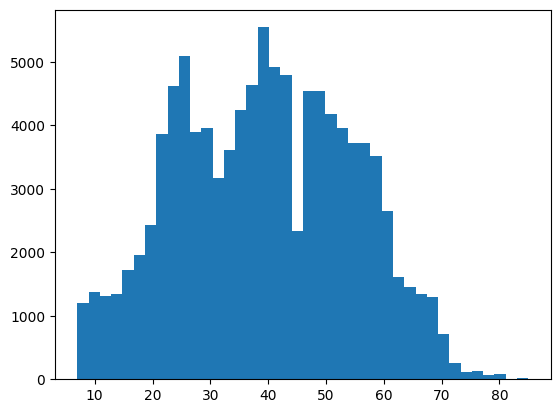

In [76]:
plt.hist(data['age'], bins=40);

In [77]:
data[data['age'] < 12]

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
20,39076,Male,Loyal Customer,9,Gift,Medium,1174,2,4,2,4,2,2,1,2,1,5,3,4,3,2,0,4.0,Neutral or Dissatisfaction
106,37373,Male,disloyal Customer,11,Gift,Medium,972,1,1,1,3,1,1,1,1,4,3,4,2,1,1,0,0.0,Neutral or Dissatisfaction
122,8256,Male,Loyal Customer,11,Personal,Medium,335,1,5,1,3,3,1,3,3,4,2,4,5,5,3,0,0.0,Neutral or Dissatisfaction
129,45561,Male,Loyal Customer,8,Gift,Medium,1304,4,4,4,4,4,4,4,4,2,2,4,2,1,4,0,0.0,Satisfied
177,14030,Male,disloyal Customer,8,Gift,Large,1117,4,3,4,3,3,4,3,3,4,5,4,4,3,3,0,7.0,Neutral or Dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103744,127680,Female,Loyal Customer,10,Personal,Small,2153,1,5,1,2,3,1,4,3,5,3,5,5,4,3,5,2.0,Neutral or Dissatisfaction
103783,41688,Male,Loyal Customer,11,Personal,Medium,936,2,4,2,4,3,2,3,3,3,5,5,5,5,3,44,62.0,Neutral or Dissatisfaction
103851,112270,Male,disloyal Customer,8,Gift,Medium,1036,3,3,3,1,5,3,5,5,3,4,4,5,4,5,1,0.0,Neutral or Dissatisfaction
103862,69728,Female,Loyal Customer,8,Personal,Medium,1372,3,4,3,1,2,3,2,2,3,3,3,5,4,2,0,13.0,Neutral or Dissatisfaction


Há 3255 avaliações realizadas por crianças com menos de 12.

#### 4.1.2.2. <a id='toc4_1_2_2_'></a>[Checking the scoring for each evaluation criteria for all the dataset](#toc0_)

In [78]:
cols_order = ['instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness']

In [79]:
notas = pd.DataFrame(data[cols_order].mean().round(2), columns=['mean'])

In [80]:
notas

,mean
instore_wifi,2.73
open/close_time_convenient,3.06
easy_of_online_shopping,2.76
store_location,2.98
toilet_cleaning,3.20
dressing_room,3.25
waiting_room,3.44
kids_entertainment,3.36
seller_service,3.38
showroom,3.35


In [81]:
notas.sort_values('mean')

,mean
instore_wifi,2.73
easy_of_online_shopping,2.76
store_location,2.98
open/close_time_convenient,3.06
toilet_cleaning,3.20
dressing_room,3.25
cleanliness,3.29
purchase_service,3.30
showroom,3.35
kids_entertainment,3.36


As notas médias ordenadas de menor para maior estão a seguinte forma:

    - 'instore_wifi', 
    - 'easy_of_online_shopping', 
    - 'store_location', 
    - 'open/close_time_convenient', 
    - 'toilet_cleaning', 
    - 'dressing_room', 
    - 'cleanliness', 
    - 'purchase_service', 
    - 'showroom', 
    - 'kids_entertainment', 
    - 'seller_service', 
    - 'waiting_room', 
    - 'self-store', 
    - 'store_service'

#### 4.1.2.3. <a id='toc4_1_2_3_'></a>[Checking the scoring filtering for people over 12 years old](#toc0_)

In [82]:
data_plus12 = data[data['age'] >= 12]

In [83]:
notas_plus12 = pd.DataFrame(data_plus12[cols_order].mean().round(2), columns=['mean'])

In [84]:
notas_plus12.sort_values('mean')

,mean
instore_wifi,2.74
easy_of_online_shopping,2.76
store_location,2.98
open/close_time_convenient,3.05
toilet_cleaning,3.21
dressing_room,3.27
cleanliness,3.30
purchase_service,3.31
showroom,3.36
kids_entertainment,3.37


## 4.2. <a id='toc4_2_'></a>[Formatting the categorical features](#toc0_)

In [85]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


#### 4.2.1.1. <a id='toc4_2_1_1_'></a>['gender'](#toc0_)

In [86]:
data['is_female'] = data['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [87]:
data[['gender', 'is_female']].sample(10)

,gender,is_female
12042,Male,0
81879,Female,1
6113,Male,0
5304,Female,1
46738,Male,0
18860,Female,1
52411,Female,1
3959,Male,0
91893,Male,0
35341,Male,0


#### 4.2.1.2. <a id='toc4_2_1_2_'></a>['customer_type'](#toc0_)

In [88]:
data.customer_type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [89]:
data['is_loyal'] = data['customer_type'].apply(lambda x: 1 if (x == 'Loyal Customer') else 0)

In [90]:
data[['customer_type', 'is_loyal']].sample(10)

,customer_type,is_loyal
93872,Loyal Customer,1
3587,Loyal Customer,1
101598,Loyal Customer,1
93227,disloyal Customer,0
100498,Loyal Customer,1
23642,Loyal Customer,1
49228,Loyal Customer,1
72644,Loyal Customer,1
100885,Loyal Customer,1
73288,Loyal Customer,1


#### 4.2.1.3. <a id='toc4_2_1_3_'></a>['type of purchase'](#toc0_)

In [91]:
data['type_of_purchase'].unique()

array(['Personal', 'Gift'], dtype=object)

In [92]:
data['is_gift'] =  data['type_of_purchase'].apply(lambda x: 1 if x == 'Gift' else 0)

In [93]:
data[['type_of_purchase', 'is_gift']].sample(10)

,type_of_purchase,is_gift
51516,Gift,1
15393,Gift,1
36690,Gift,1
5613,Gift,1
70129,Gift,1
89048,Gift,1
86806,Gift,1
11970,Personal,0
39354,Gift,1
27828,Personal,0


#### 4.2.1.4. <a id='toc4_2_1_4_'></a>['store_size'](#toc0_)

In [94]:
data['store_size'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

In [95]:
data['store_size_numeric'] = data['store_size'].apply(lambda x: 1 if x == 'Small' else 2 if x == 'Medium' else 3)

In [96]:
data[['store_size', 'store_size_numeric']].sample(10)

,store_size,store_size_numeric
7515,Medium,2
90088,Large,3
15545,Large,3
58919,Large,3
94542,Large,3
91045,Medium,2
9560,Large,3
42402,Large,3
56889,Medium,2
68865,Large,3


#### 4.2.1.5. <a id='toc4_2_1_5_'></a>['satisfaction' (target feature)](#toc0_)

In [97]:
data['satisfaction'].unique()

array(['Neutral or Dissatisfaction', 'Satisfied'], dtype=object)

In [98]:
data['is_satisfied'] = data['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

In [99]:
data[['satisfaction', 'is_satisfied']].sample(10)

,satisfaction,is_satisfied
13046,Neutral or Dissatisfaction,0
64629,Satisfied,1
4826,Neutral or Dissatisfaction,0
1301,Neutral or Dissatisfaction,0
98260,Neutral or Dissatisfaction,0
9843,Satisfied,1
25343,Neutral or Dissatisfaction,0
40473,Neutral or Dissatisfaction,0
34357,Neutral or Dissatisfaction,0
18227,Neutral or Dissatisfaction,0


## 4.3. <a id='toc4_3_'></a>[Sticking only with numeric variables](#toc0_)

In [100]:
data

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction,0,1,0,1,0
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction,0,0,1,3,0
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied,1,1,1,3,1
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction,1,1,1,3,0
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Gift,Medium,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,Neutral or Dissatisfaction,1,0,1,2,0
103900,73097,Male,Loyal Customer,49,Gift,Large,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,Satisfied,0,1,1,3,1
103901,68825,Male,disloyal Customer,30,Gift,Large,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,Neutral or Dissatisfaction,0,0,1,3,0
103902,54173,Female,disloyal Customer,22,Gift,Medium,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,Neutral or Dissatisfaction,1,0,1,2,0


In [101]:
num_data = data.select_dtypes(include=np.number)

In [102]:
num_data

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1,0,1,2,0
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0,1,1,3,1
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,3,0
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1,0,1,2,0


# 5. <a id='toc5_'></a>[Feature Engineering and Hypothesis Creation](#toc0_)

In [105]:
df = num_data

In [106]:
# df.to_csv('/home/bruno/repos/HackDays/data/train_numeric.csv', index=False)
# df = pd.read_csv('/home/bruno/repos/HackDays/data/train_numeric.csv', low_memory=False)

In [107]:
df

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1,0,1,2,0
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0,1,1,3,1
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,3,0
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1,0,1,2,0


## Hypothesis Testing

#### H01. loyal clients are more satisfied - TRUE

In [108]:
data[['is_satisfied', 'is_loyal']].groupby('is_loyal').mean().reset_index()

,is_loyal,is_satisfied
0,0,0.236658
1,1,0.477291


#### H02. bigger store have more unsatisfied customers - FALSE

In [109]:
data[['is_satisfied', 'store_size_numeric']].groupby('store_size_numeric').mean().reset_index()

,store_size_numeric,is_satisfied
0,1,0.246064
1,2,0.186138
2,3,0.694251


#### H03. women are more satisfied - FALSE

#### H04. delivery delay - TRUE

In [110]:
df[['is_satisfied', 'delivery_delay_in_minutes']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,delivery_delay_in_minutes
0,0,17.127536
1,1,12.630799


#### H05. wifi - TRUE

In [111]:
df[['is_satisfied', 'instore_wifi']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,instore_wifi
0,0,2.399633
1,1,3.161288


#### H06. open/close time - FALSE

In [112]:
df[['is_satisfied', 'open/close_time_convenient']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,open/close_time_convenient
0,0,3.129112
1,1,2.970305


#### H07. online purchase - TRUE

In [113]:
df[['is_satisfied', 'easy_of_online_shopping']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,easy_of_online_shopping
0,0,2.546850
1,1,3.031582


#### H08. store location - FALSE

In [114]:
df[['is_satisfied', 'store_location']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,store_location
0,0,2.976121
1,1,2.977879


#### H09. toilet_cleaning

In [115]:
df[['is_satisfied', 'toilet_cleaning']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,toilet_cleaning
0,0,2.95805
1,1,3.52131


#### H10. dressing_room	

In [116]:
df[['is_satisfied', 'dressing_room']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,dressing_room
0,0,2.656125
1,1,4.027474


#### H111. waiting_room	

In [117]:
df[['is_satisfied', 'waiting_room']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,waiting_room
0,0,3.036295
1,1,3.966530


#### H12. kids_entertainment	

In [118]:
df[['is_satisfied', 'kids_entertainment']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,kids_entertainment
0,0,2.894156
1,1,3.964931


#### H13. seller_service		

In [119]:
df[['is_satisfied', 'seller_service']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,seller_service
0,0,3.019158
1,1,3.857324


#### H14. showroom

In [120]:
df[['is_satisfied', 'showroom']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,showroom
0,0,2.990812
1,1,3.822143


#### H15. self-store	

In [121]:
df[['is_satisfied', 'self-store']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,self-store
0,0,3.375991
1,1,3.966396


#### H16. purchase_service

In [122]:
df[['is_satisfied', 'purchase_service']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,purchase_service
0,0,3.042952
1,1,3.646041


#### H17. store_service	

In [123]:
df[['is_satisfied', 'toilet_cleaning']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,toilet_cleaning
0,0,2.95805
1,1,3.52131


#### H18. cleanliness	

In [124]:
df[['is_satisfied', 'toilet_cleaning']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,toilet_cleaning
0,0,2.95805
1,1,3.52131


#### H19. more distance

In [125]:
df[['is_satisfied', 'store_distance']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,store_distance
0,0,928.919971
1,1,1530.140255


#### H20. is_gift

In [126]:
df[['is_satisfied', 'is_gift']].groupby('is_gift').mean().reset_index()

,is_gift,is_satisfied
0,0,0.101678
1,1,0.582597


#### H21. is_gift and delay

In [127]:
df_aux = df[['is_satisfied', 'is_gift', 'delivery_delay_in_minutes']]
df_aux['is_delayed'] = df_aux['delivery_delay_in_minutes'].apply(lambda x: 1 if x>0 else 0)
df_aux[['is_satisfied', 'is_gift', 'is_delayed']].groupby(['is_gift', 'is_delayed']).mean().reset_index()

,is_gift,is_delayed,is_satisfied
0,0,0,0.130763
1,0,1,0.063482
2,1,0,0.628246
3,1,1,0.524386


## Making new features

### Mean score per sale

In [129]:
df['mean_score'] = df[['instore_wifi','open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness']].mean(axis=1).round(2)

In [130]:
df

,id,age,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,is_female,is_loyal,is_gift,store_size_numeric,is_satisfied,mean_score
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,3.86
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,3,0,2.29
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,1,3,1,3.71
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,1,1,3,0,3.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,1,3,1,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,1,0,1,2,0,2.21
103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,0,1,1,3,1,4.36
103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,3,0,3.07
103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,1,0,1,2,0,2.29


## More hypothesis testing

#### H22. Clients with average score above 3 are satisfied - TRUE

In [131]:
df[['is_satisfied', 'mean_score']].groupby('is_satisfied').mean().reset_index()

,is_satisfied,mean_score
0,0,2.953584
1,1,3.616221


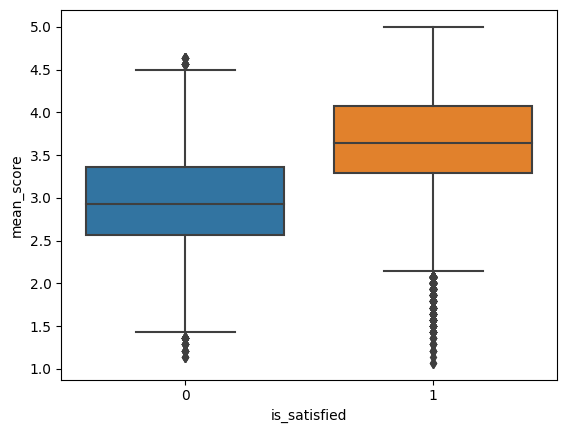

In [132]:
sns.boxplot(data=df, x='is_satisfied', y='mean_score');

#### Age slices

In [142]:
df['age_category'] = df['age'].apply(lambda x: 1 if x < 18 else 2 if x < 30 else 3 if x < 45 else 4 if x < 60 else 5)

In [146]:
df[['age', 'age_category']].sample(10)

,age,age_category
2316,18,2
97479,35,3
33611,69,5
98867,36,3
96109,10,1
98287,57,4
91920,41,3
76066,24,2
2375,53,4
80971,55,4


In [149]:
df[['is_satisfied', 'age_category']].groupby('age_category').mean().reset_index()

,age_category,is_satisfied
0,1,0.163914
1,2,0.345806
2,3,0.475488
3,4,0.574865
4,5,0.271221


# 6. <a id='toc6_'></a>[Data Selection and filtering](#toc0_)

# 7. <a id='toc7_'></a>[Exploratory Data Analysis](#toc0_)

# 8. <a id='toc8_'></a>[Data Preparation for modelling](#toc0_)

# 9. <a id='toc9_'></a>[Feature selection through algorithms](#toc0_)

# 10. <a id='toc10_'></a>[Model implementation](#toc0_)

# 11. <a id='toc11_'></a>[Hyperparameter Fine-Tuning](#toc0_)

# 12. <a id='toc12_'></a>[Model Error Estimation and Interpretation](#toc0_)

# 13. <a id='toc13_'></a>[Model Deployment](#toc0_)